In [5]:
from google.colab import drive
drive.mount('/content/drive')

# ví dụ project nằm trong Drive
PROJECT = "/content/drive/MyDrive/hazelnut_inspection_project"
%cd $PROJECT
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hazelnut_inspection_project
app.py	main.py    outputs    requirements.txt	src
data	notebooks  README.md  save_models	train.py


✅ Đã import thành công hàm remove_background!
🔍 Tìm thấy 391 ảnh. Đang test 3 ảnh ngẫu nhiên...
Testing: ./data/raw/hazelnut/train/good/116.png


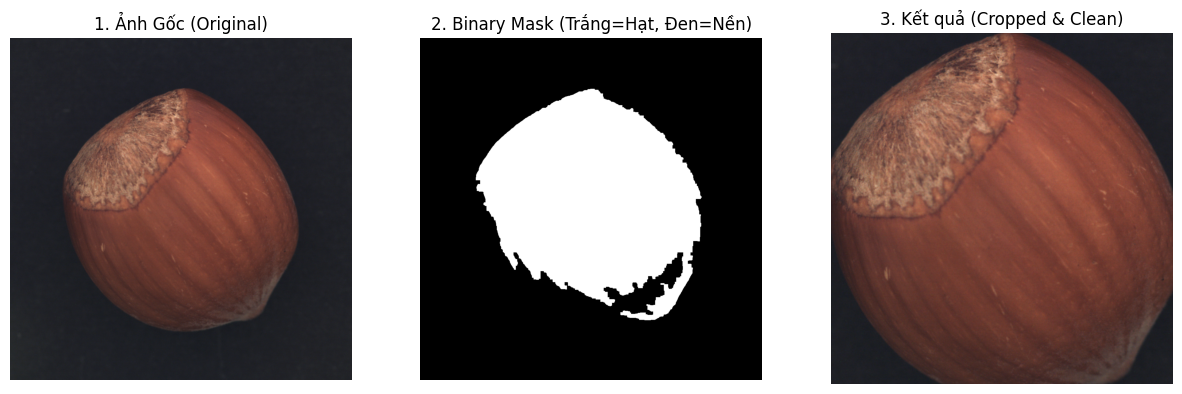

Testing: ./data/raw/hazelnut/train/good/301.png


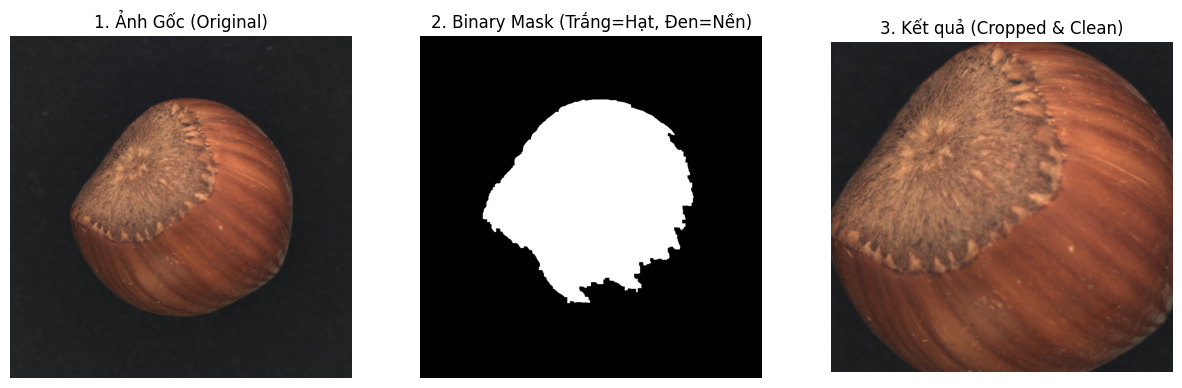

Testing: ./data/raw/hazelnut/train/good/242.png


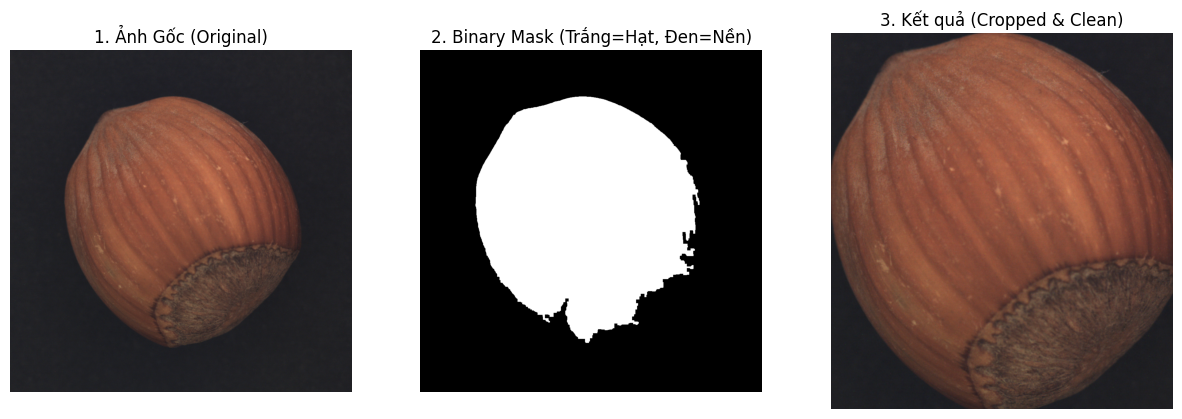

In [8]:
import cv2
import matplotlib.pyplot as plt
import sys
import os
import glob

# --- Bước 1: Hack đường dẫn để import được code từ thư mục src ---
# Vì notebook nằm trong folder 'notebooks', ta cần trỏ ra ngoài để thấy folder 'src'
sys.path.append(os.path.abspath('.'))

try:
    from src.preprocessing import remove_background
    print("✅ Đã import thành công hàm remove_background!")
except ImportError:
    print("❌ Lỗi: Không tìm thấy file src/preprocessing.py. Kiểm tra lại cấu trúc thư mục.")

# --- Bước 2: Hàm vẽ hình hỗ trợ ---
def show_comparison(original, mask, processed):
    plt.figure(figsize=(15, 5))

    # Ảnh gốc
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("1. Ảnh Gốc (Original)")
    plt.axis('off')

    # Mask (Mặt nạ) - Quan trọng nhất để debug
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("2. Binary Mask (Trắng=Hạt, Đen=Nền)")
    plt.axis('off')

    # Ảnh kết quả
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title("3. Kết quả (Cropped & Clean)")
    plt.axis('off')

    plt.show()

# --- Bước 3: Load thử ảnh và chạy test ---
# Đường dẫn này tuỳ thuộc vào nơi bạn lưu ảnh.
# Ví dụ lấy ảnh Hazelnut loại 'good'
image_paths = glob.glob('./data/raw/hazelnut/train/good/*.png')

if not image_paths:
    print("⚠️ Không tìm thấy ảnh nào! Hãy kiểm tra lại đường dẫn '../data/raw/hazelnut/train/good/'")
else:
    # Lấy thử 3 ảnh đầu tiên để test cho chắc
    print(f"🔍 Tìm thấy {len(image_paths)} ảnh. Đang test 3 ảnh ngẫu nhiên...")
    for img_path in image_paths[:3]:
        print(f"Testing: {img_path}")

        # Đọc ảnh
        img = cv2.imread(img_path)

        # --- GỌI HÀM CỦA BẠN Ở ĐÂY ---
        processed_img, mask = remove_background(img, return_full_mask=True)

        # Hiển thị kết quả
        show_comparison(img, mask, processed_img)

In [7]:
!pwd

/content/drive/MyDrive/hazelnut_inspection_project
